<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project7/Project7_Stock_Prediction_team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://dataanalyticsedge.com/wp-content/uploads/2019/11/stocks_BSE_Nifty_Sensex__markets_bse_nse_nifty-1_1280-770x433.jpg)

Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. physhological, rational and irrational behaviour, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.

Can we use machine learning as a game changer in this domain? In this project, historical stock prices data of Apple and Amazon company, from 2006 to 2017, were used for experimentation, using machine learning techniques, such as RNN, LSTM, and GRU.


#Setup

In [132]:
# Common Import
import sklearn
import pandas as pd
import numpy as np

# Algorithm libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from datetime import date

import math

# Visaulization libraries
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn version > 0.20 is required 
sklearn.__version__
# Update sklearn -> !pip install -U scikit-learn

'0.22.2.post1'

#Load Data

In [0]:
apple_stock = pd.read_csv('https://raw.githubusercontent.com/seansothey/CSC685/master/AAPL_2006-01-01_to_2018-01-01.csv',index_col='Date', parse_dates=["Date"]) 

In [0]:
apple_stock

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL


Check if there're missing data

In [0]:
apple_stock.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

No missing values. GREAT !!!

The assignment promts to use 12 motnths record; therefore, let's use data in 2016 as a training set and 2017 as a test set, by using only price 'High' column

In [0]:
train_2016 = apple_stock[:'2016'].iloc[:,1:2].values
test_2017 = apple_stock['2017':].iloc[:,1:2].values

In [0]:
train_2016.shape, test_2017.shape

((2768, 1), (251, 1))

###Visualization of "High" attribute

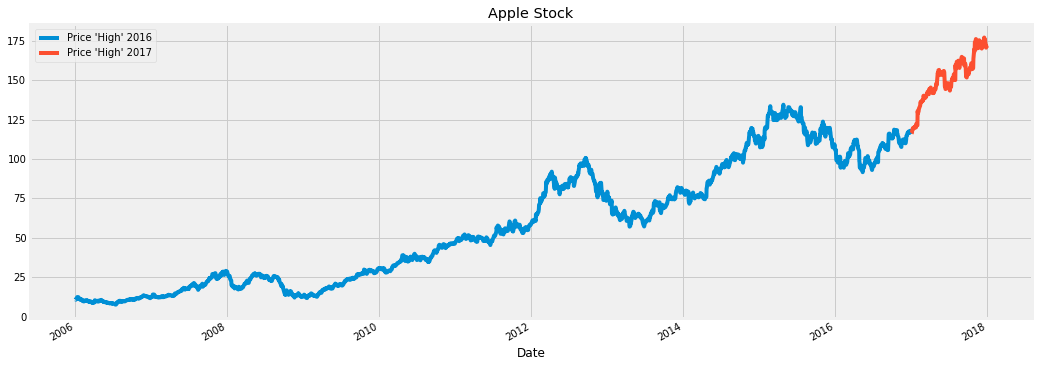

In [0]:
apple_stock["High"][:'2016'].plot(figsize=(16,6), legend=True)
apple_stock["High"]["2017":].plot(figsize=(16,6), legend=True)
plt.legend(["Price 'High' 2016", "Price 'High' 2017"])
plt.title("Apple Stock")
plt.show()

###Scale the training set

In [0]:
sc = MinMaxScaler(feature_range=(0,1))
train_sc = sc.fit_transform(train_2016)

###Create traininig set for LSTM with X=10 days for each output y

In [0]:
X_train = []
y_train = []

for i in range(10,train_2016.shape[0]):
    X_train.append(train_sc[i-10:i, 0])
    y_train.append(train_sc[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train[0] # 10 days data

array([0.0245708 , 0.02590959, 0.0247283 , 0.02677587, 0.02732714,
       0.03260356, 0.03583241, 0.03764372, 0.03724996, 0.03764372])

In [0]:
y_train[0]

0.035044888958891164

In [0]:
X_train.shape, y_train.shape

((2758, 10), (2758,))

In [0]:
# Reshape X_train for efficient modelling

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
X_train.shape

(2758, 10, 1)

#LSTM's model

In [0]:
regressor = Sequential()

# add first layer with dropout
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add fourth layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer
regressor.add(Dense(units=1))

###Compile LSTM RNN network

In [0]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

###Fit the model with training set

In [249]:
regressor.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.30)

1930/1930 [==============================] - 2s 936us/step - loss: 8.0897e-04 - val_loss: 0.0196
Epoch 6/150
1930/1930 [==============================] - 2s 949us/step - loss: 7.5643e-04 - val_loss: 0.0091
Epoch 7/150
1930/1930 [==============================] - 2s 943us/step - loss: 7.7312e-04 - val_loss: 0.0131
Epoch 8/150
1930/1930 [==============================] - 2s 968us/step - loss: 7.9846e-04 - val_loss: 0.0132
Epoch 9/150
1930/1930 [==============================] - 2s 995us/step - loss: 8.0203e-04 - val_loss: 0.0096
Epoch 10/150
1930/1930 [==============================] - 2s 948us/step - loss: 7.2041e-04 - val_loss: 0.0121
Epoch 11/150
1930/1930 [==============================] - 2s 971us/step - loss: 7.7757e-04 - val_loss: 0.0140
Epoch 12/150
1930/1930 [==============================] - 2s 973us/step - loss: 7.5673e-04 - val_loss: 0.0122
Epoch 13/150
1930/1930 [==============================] - 2s 969us/step - loss: 6.8824e-04 - val_loss: 0.0091
Epoch 14/150
1930/1930 [===

Train on 1930 samples, validate on 828 samples
Epoch 1/150
1930/1930 [==============================] - 2s 952us/step - loss: 4.9824e-04 - val_loss: 0.0048
Epoch 2/150
1930/1930 [==============================] - 2s 942us/step - loss: 4.9909e-04 - val_loss: 0.0071
Epoch 3/150
1930/1930 [==============================] - 2s 929us/step - loss: 4.8677e-04 - val_loss: 0.0060
Epoch 4/150
1930/1930 [==============================] - 2s 911us/step - loss: 4.5354e-04 - val_loss: 0.0058
Epoch 5/150
1930/1930 [==============================] - 2s 904us/step - loss: 4.6287e-04 - val_loss: 0.0149
Epoch 6/150
1930/1930 [==============================] - 2s 910us/step - loss: 5.1452e-04 - val_loss: 0.0053
Epoch 7/150
1930/1930 [==============================] - 2s 890us/step - loss: 4.6761e-04 - val_loss: 0.0088
Epoch 8/150
1930/1930 [==============================] - 2s 908us/step - loss: 4.8865e-04 - val_loss: 0.0054
Epoch 9/150
1930/1930 [==============================] - 2s 912us/step - loss: 4.

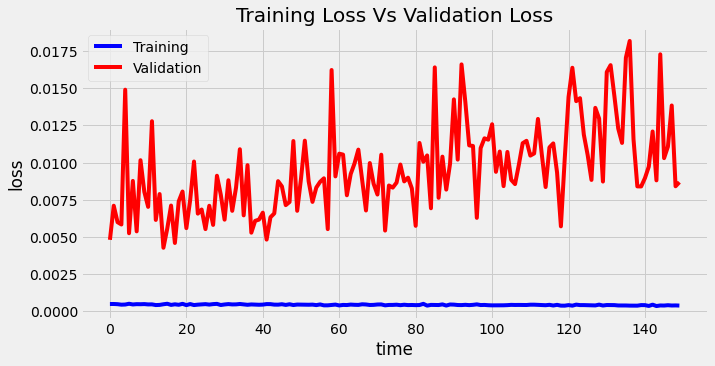

In [300]:
plt.figure(figsize=(10,5))
plt.plot(regressor.history.history['loss'], label='Training', color='blue')
plt.plot(regressor.history.history['val_loss'], label='Validation', color='red')
plt.legend()
plt.title("Training Loss Vs Validation Loss")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()

###Preprocessing test set

In [251]:
data_concat = pd.concat((apple_stock['High'][:'2016'], apple_stock['High']['2017':]), axis=0)
print(data_concat.shape)

inputs = data_concat[len(data_concat)-len(test_2017)-10 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

(3019,)
(261,)
(261, 1)


In [0]:
X_test = []
for i in range(10,inputs.shape[0]):
    X_test.append(inputs[i-10:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

###Predict stock price in 2017

In [0]:
pred_lstm = regressor.predict(X_test)
pred_lstm = sc.inverse_transform(pred_lstm)

###Plot prediction

In [0]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="Actual")
    plt.plot(predicted, color="blue", label="Predicted")
    plt.title("Apple stock price prediction")
    plt.xlabel("time")
    plt.ylabel("Apple stock price")
    plt.legend()
    plt.show()

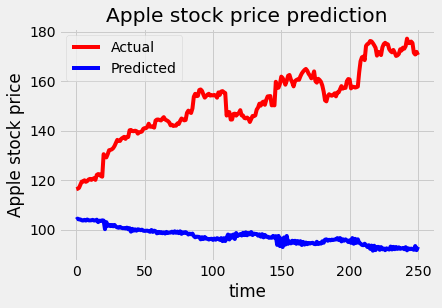

In [255]:
plot_predictions(test_2017, pred_lstm)

###RMSE of the model

In [0]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("RMSE = {}.".format(rmse))

In [257]:
return_rmse(test_2017, pred_lstm)

RMSE = 57.20531523139807.


#GRU's model

In [0]:
regressorGRU = Sequential()

# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

###Compile the model

In [0]:
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

###Fit the model with training set

In [302]:
regressorGRU.fit(X_train, y_train, epochs=150, batch_size=150, validation_split=0.30)

Train on 1930 samples, validate on 828 samples
Epoch 1/150
1930/1930 [==============================] - 1s 442us/step - loss: 0.0011 - val_loss: 8.7348e-04
Epoch 2/150
1930/1930 [==============================] - 1s 433us/step - loss: 0.0013 - val_loss: 8.4351e-04
Epoch 3/150
1930/1930 [==============================] - 1s 434us/step - loss: 0.0012 - val_loss: 7.6625e-04
Epoch 4/150
1930/1930 [==============================] - 1s 434us/step - loss: 0.0014 - val_loss: 7.5866e-04
Epoch 5/150
1930/1930 [==============================] - 1s 462us/step - loss: 0.0013 - val_loss: 8.7211e-04
Epoch 6/150
1930/1930 [==============================] - 1s 443us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/150
1930/1930 [==============================] - 1s 445us/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/150
1930/1930 [==============================] - 1s 442us/step - loss: 0.0012 - val_loss: 8.6394e-04
Epoch 9/150
1930/1930 [==============================] - 1s 445us/step - loss: 0.0012 - v

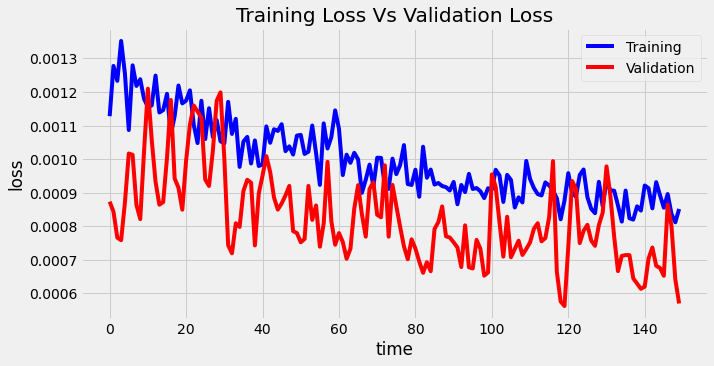

In [303]:
plt.figure(figsize=(10,5))
plt.plot(regressorGRU.history.history['loss'], label='Training', color='blue')
plt.plot(regressorGRU.history.history['val_loss'], label='Validation', color='red')
plt.legend()
plt.title("Training Loss Vs Validation Loss")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()

###Predict the stock price

In [0]:
pred_gru = regressorGRU.predict(X_test)
pred_gru = sc.inverse_transform(pred_gru)

###Plot the prediction

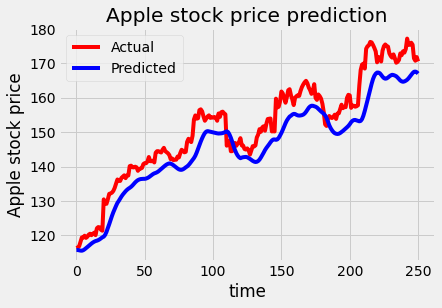

In [305]:
plot_predictions(test_2017, pred_gru)

###RMSE of the model

In [306]:
return_rmse(test_2017, pred_gru)

RMSE = 6.41773914078695.


#Testing Models

here the model will be tested with three different period as following:
1. 2020-4-3 to 2020-5-1
2. The next five monthes after 2018-1-1
3. The next ten monthes after 2018-1-1




In [0]:
def preprossing_data_rnns(data):
  sc = MinMaxScaler(feature_range=(0,1))
  train_sc = sc.fit_transform(data)
  data_x = []
  data_y = []
  for i in range(10,len(data)):
    data_x.append(data[i-10:i, 0])
    data_y.append(data[i,0])
  data_x, data_y = np.array(data_x), np.array(data_y)
  data_x = np.reshape(data_x, (data_x.shape[0], data_x.shape[1], 1))
  return data_x, data_y

def predic_using_LSTM(data_x):
  pred_lstm_new = regressor.predict(data_x)
  pred_lstm_new = sc.inverse_transform(pred_lstm_new)
  return pred_lstm_new

def predic_using_gru(data_x):
  pred_gru_new = regressorGRU.predict(data_x)
  pred_gru_new = sc.inverse_transform(pred_gru_new)
  return pred_gru_new


##Get the pariod from 2020-4-3 to 2020-5-1 months after 2018-1-1

In [0]:
apple_data_4_5 = pd.read_csv('https://raw.githubusercontent.com/ahshawaf/AML/project7/APPL_2020-03-04_to_2020-01-05.csv',index_col='Date', parse_dates=["Date"]) 

In [309]:
apple_data_4_5.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-05-01,289.07,60154180.0,286.25,299.00,285.85
2020-04-30,293.80,45765970.0,289.96,294.53,288.35
2020-04-29,287.73,34320200.0,284.73,289.67,283.89
2020-04-28,278.58,28001190.0,285.08,285.83,278.20
2020-04-27,283.17,29271890.0,281.80,284.54,279.95


In [310]:
apple_data_4_5_high = apple_data_4_5.iloc[:,3].values
apple_data_4_5_high

array([299.  , 294.53, 289.67, 285.83, 284.54, 283.01, 281.75, 277.9 ,
       277.25, 281.68, 286.95, 288.2 , 286.33, 288.25, 273.7 , 270.07,
       267.37, 271.7 , 263.11, 245.7 ])

In [311]:
apple_data_4_5_high.shape

(20,)

In [312]:
apple_data_4_5_high=apple_data_4_5_high.reshape(-1,1)
apple_data_4_5_high.shape

(20, 1)

In [0]:
apple_x_4_5,apple_y_4_5 = preprossing_data_rnns(np.array(apple_data_4_5_high))

In [0]:
pred_lstm_apple_4_5 = predic_using_LSTM(apple_x_4_5)

In [315]:
pred_lstm_apple_4_5

array([[79.01445 ],
       [79.014465],
       [79.01448 ],
       [79.01447 ],
       [79.01448 ],
       [79.014435],
       [79.014435],
       [79.014435],
       [79.01446 ],
       [79.014435]], dtype=float32)

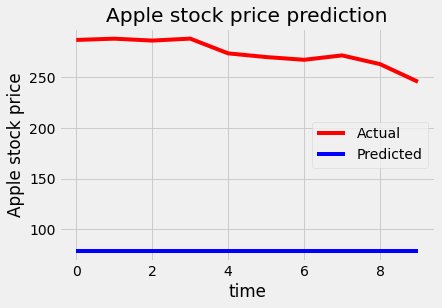

In [316]:
plot_predictions(apple_y_4_5,pred_lstm_apple_4_5)

In [317]:
return_rmse(apple_y_4_5,pred_lstm_apple_4_5)

RMSE = 195.56085599088885.


In [0]:
pred_gru_apple_4_5 = predic_using_gru(apple_x_4_5)

In [319]:
pred_gru_apple_4_5

array([[382.17358],
       [382.32022],
       [382.42325],
       [382.4765 ],
       [382.49066],
       [382.49063],
       [382.49005],
       [382.4964 ],
       [382.49734],
       [382.5249 ]], dtype=float32)

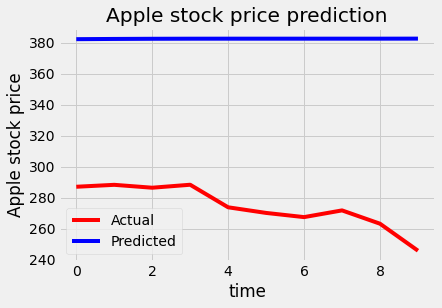

In [320]:
plot_predictions(apple_y_4_5,pred_gru_apple_4_5)

In [321]:
return_rmse(apple_y_4_5,pred_gru_apple_4_5)

RMSE = 109.09416093303675.


In [0]:

data_2 = pd.read_csv('https://raw.githubusercontent.com/ahshawaf/AML/project7/AAPL_2015-04-05_to_2020-01-05.csv',index_col='Date', parse_dates=["Date"]) 

##Get the next five months after 2018-1-1

In [323]:
data_2.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-05-01,289.07,60154180.0,286.25,299.00,285.85
2020-04-30,293.80,45765970.0,289.96,294.53,288.35
2020-04-29,287.73,34320200.0,284.73,289.67,283.89
2020-04-28,278.58,28001190.0,285.08,285.83,278.20
2020-04-27,283.17,29271890.0,281.80,284.54,279.95


In [0]:
#this is a custom function get the a specific data with a specific period. The 'from date' is included but the 'to date' is not
def get_period_of_data(data,from_year,from_month,from_day,to_year,to_month,to_day):
  from_date = pd.Timestamp(date(from_year,from_month,from_day))
  to_date = pd.Timestamp(date(to_year,to_month,to_day))
  result = data_2[(data.index >= from_date) &  (data.index < to_date)]
  return result

##Predict for the next five months

In [325]:
apple_1_5=get_period_of_data(data_2,2018,1,1,2018,6,1)
apple_1_5

,Close/Last,Volume,Open,High,Low
Date,,,,,
2018-05-31,186.87,27468700.0,187.22,188.23,186.14
2018-05-30,187.50,18503410.0,187.72,188.00,186.78
2018-05-29,187.90,22409110.0,187.60,188.75,186.87
2018-05-25,188.58,17186760.0,188.23,189.65,187.65
2018-05-24,188.15,23129400.0,188.77,188.84,186.21
...,...,...,...,...,...
2018-01-08,174.35,20523870.0,174.35,175.61,173.93
2018-01-05,175.00,23589930.0,173.44,175.37,173.05
2018-01-04,173.03,22342650.0,172.54,173.47,172.08


In [0]:
apple_1_5_high = apple_1_5.iloc[:,3].values

In [327]:
apple_1_5_high

array([188.23, 188.  , 188.75, 189.65, 188.84, 188.5 , 188.88, 189.27,
       187.81, 188.91, 188.46, 187.07, 189.53, 190.06, 190.37, 187.4 ,
       186.22, 187.67, 184.25, 177.5 , 177.75, 169.2 , 167.26, 164.33,
       165.73, 165.42, 166.33, 166.92, 171.22, 175.39, 178.82, 178.94,
       176.19, 175.84, 175.  , 173.92, 174.  , 173.09, 172.48, 174.23,
       172.01, 168.75, 168.94, 171.75, 170.02, 175.15, 173.1 , 169.92,
       172.68, 175.09, 176.8 , 177.47, 179.12, 180.24, 180.52, 183.5 ,
       182.39, 180.  , 177.12, 175.85, 178.25, 177.74, 176.3 , 179.78,
       180.62, 180.48, 179.39, 175.65, 173.95, 174.12, 174.26, 174.82,
       173.09, 167.54, 164.75, 163.89, 157.89, 161.  , 163.4 , 163.72,
       163.88, 166.8 , 168.62, 168.44, 167.37, 170.16, 172.  , 174.95,
       177.3 , 179.44, 177.78, 179.58, 180.1 , 179.25, 179.39, 177.36,
       175.49, 174.3 , 175.06, 175.61, 175.37, 173.47, 174.55, 172.3 ])

In [328]:
apple_1_5_high = apple_1_5_high.reshape(-1,1)
apple_1_5_high.shape

(104, 1)

In [0]:
apple_1_5_x,apple_1_5_y = preprossing_data_rnns(np.array(apple_1_5_high))

predict using LSTM

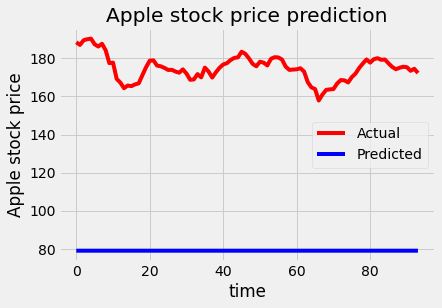

In [330]:
apple_1_5_pred= predic_using_LSTM(apple_1_5_x)
plot_predictions(apple_1_5_y,apple_1_5_pred)

In [331]:
return_rmse(apple_1_5_y,apple_1_5_pred)

RMSE = 96.11267485946718.


predict using gru

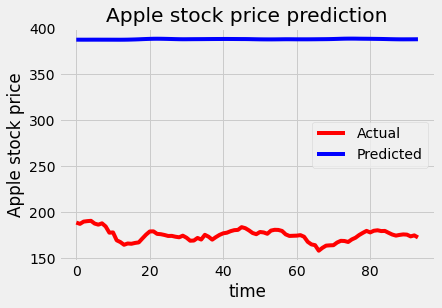

In [332]:
apple_1_5_pred= predic_using_gru(apple_1_5_x)
plot_predictions(apple_1_5_y,apple_1_5_pred)

In [333]:
return_rmse(apple_1_5_y,apple_1_5_pred)

RMSE = 213.19108216055693.


##Get the next ten months after 2018-1-1

In [334]:
apple_1_11=get_period_of_data(data_2,2018,1,1,2018,11,1)
apple_1_11

,Close/Last,Volume,Open,High,Low
Date,,,,,
2018-10-31,218.86,38016810.0,216.88,220.45,216.62
2018-10-30,213.30,36487930.0,211.15,215.18,209.27
2018-10-29,212.24,45713690.0,219.19,219.69,206.09
2018-10-26,216.30,47191700.0,215.90,220.19,212.67
2018-10-25,219.80,29027340.0,217.71,221.38,216.75
...,...,...,...,...,...
2018-01-08,174.35,20523870.0,174.35,175.61,173.93
2018-01-05,175.00,23589930.0,173.44,175.37,173.05
2018-01-04,173.03,22342650.0,172.54,173.47,172.08


In [335]:
apple_1_11_high = apple_1_11.iloc[:,3].values
apple_1_11_high.shape

(211,)

In [336]:
apple_1_11_high = apple_1_11_high.reshape(-1,1)
apple_1_11_high.shape

(211, 1)

In [0]:
apple_1_11_x,apple_1_11_y = preprossing_data_rnns(np.array(apple_1_11_high))

predict using LSTM

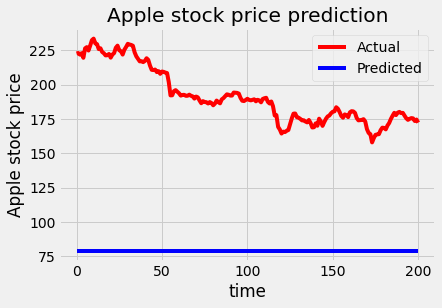

In [338]:
apple_1_11_pred= predic_using_LSTM(apple_1_11_x)
plot_predictions(apple_1_11_y,apple_1_11_pred)

In [339]:
return_rmse(apple_1_11_y,apple_1_11_pred)

RMSE = 114.1922822698064.


predict using GRU

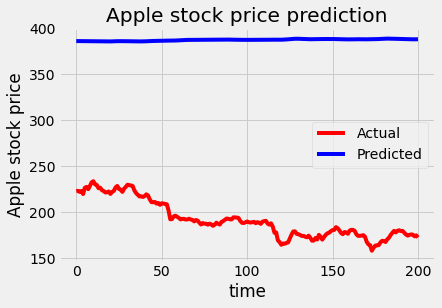

In [340]:
apple_1_11_pred= predic_using_gru(apple_1_11_x)
plot_predictions(apple_1_11_y,apple_1_11_pred)

In [341]:
return_rmse(apple_1_11_y,apple_1_11_pred)

RMSE = 196.8758861414582.


#Refrences

- https://www.kaggle.com/dpamgautam/stock-price-prediction-lstm-gru-rnn/notebook

- http://queirozf.com/entries/pandas-dataframe-examples-manipulating-date-and-time

- https://www.nasdaq.com/market-activity/stocks/aapl/historical


